<h1>Introduction </h1>

In this project, we were not as concerned with accuracy of our models because we don't need to know how accurate we are at predicting that someone is or is not interested in car insurance. Instead, we want to know how many people are actually interested. So the focus of our models will be to improve the overall precision and recall <b> NOT </b> the accuracy. 

<h1> Initial Exploration </h1>

###### Import the data

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import learning_curve
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(color_codes=True)
sns.set(font_scale=2)

In [2]:
#df = pd.read_csv('https://raw.githubusercontent.com/dblilienthal/CSV_Files/main/health_insurance_data/train.csv') # This is to get the data online
df = pd.read_csv("C:/Users/dlili/OneDrive/Documents/CSUMB/Fall 2020/CST383 Data Science/Project 2/health_insurance_data.csv") # This is my local data link

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [6]:
df.describe(include=['O'])

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


Below is a graph of how many unique values for each columns in the data set. 

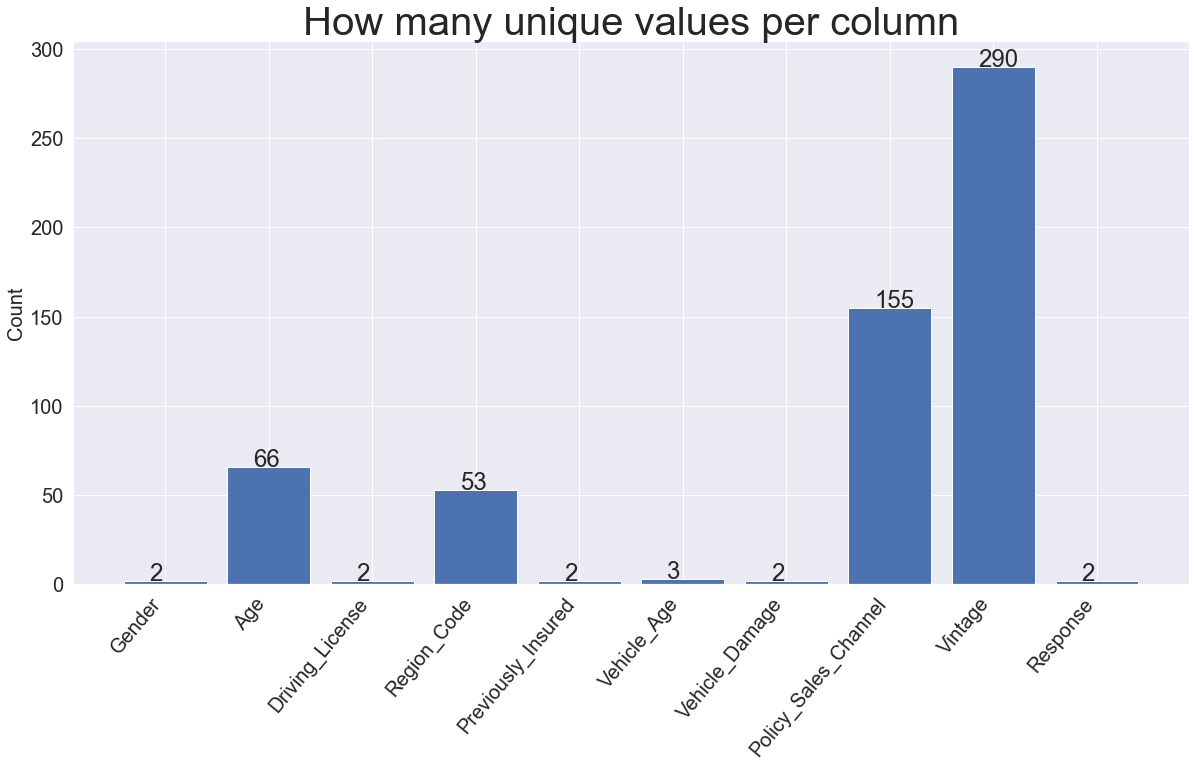

In [7]:
temp_dict = {}
for col in df.columns:
    if (col == 'Annual_Premium') | (col == 'id'):
        continue
    temp_dict[col] = df[col].unique().size
    
ax = plt.bar(temp_dict.keys(),temp_dict.values())
plt.title('How many unique values per column', fontsize=40)
plt.xticks(fontsize=20, horizontalalignment='right')
plt.yticks(fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.tick_params(axis='x', which='both', labelsize=20, labelbottom=True, rotation=50)
for i, col in enumerate(ax.patches):
    plt.text(col.get_x()+0.25, col.get_height(), list(temp_dict.values())[i]);

In [8]:
df['Annual_Premium'].unique().size

48838

Annual_Premium was not included in the graph because it contains 48,838 unique values in the data set. Id was also not included.

<h1> Initial preprocessing and cleaning </h1>

The column <b>id</b> is not useful so we will initially drop it

In [9]:
df.drop(columns=['id'], inplace=True)

In [10]:
pd.DataFrame(df.isna().mean(), index=df.columns, columns=['Percentage Missing'])

,Percentage Missing
Gender,0.0
Age,0.0
Driving_License,0.0
Region_Code,0.0
Previously_Insured,0.0
Vehicle_Age,0.0
Vehicle_Damage,0.0
Annual_Premium,0.0
Policy_Sales_Channel,0.0
Vintage,0.0


There is no missing data in the data set

<h1> Exploration and visualization </h1>

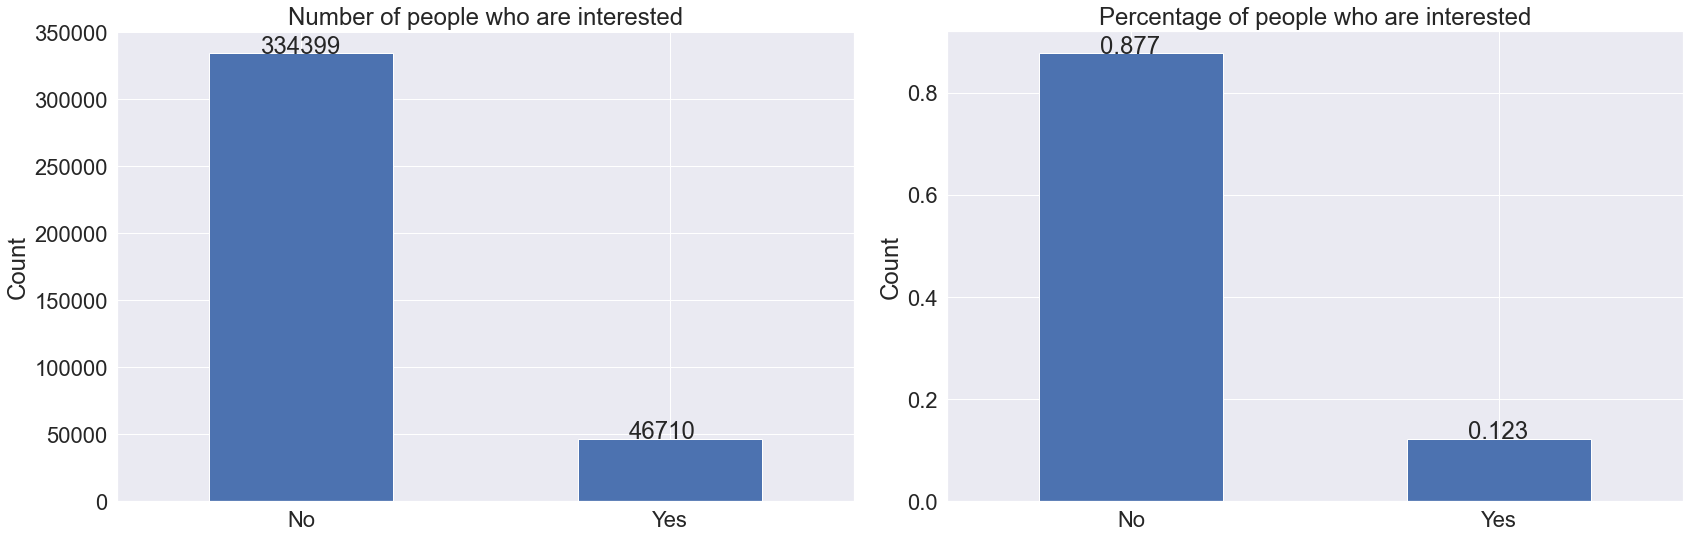

In [11]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))
# Left plot
df['Response'].value_counts().plot.bar(ax=ax1)
ax1.set_title('Number of people who are interested')
plt.sca(ax1)
plt.xticks([0,1],('No', 'Yes'), rotation=0)
ax1.set_ylabel('Count')
for i, col in enumerate(ax1.patches):
    ax1.text(col.get_x()+0.14, col.get_height(), df['Response'].value_counts()[i].round(3))
# Right plot
df['Response'].value_counts(normalize=True).plot.bar(ax=ax2)
ax2.set_title('Percentage of people who are interested')
plt.sca(ax2)
plt.xticks([0,1],('No', 'Yes'), rotation=0)
ax2.set_ylabel('Count')
for i, col in enumerate(ax2.patches):
    ax2.text(col.get_x()+0.165, col.get_height(), df['Response'].value_counts(normalize=True)[i].round(3))
plt.tight_layout();

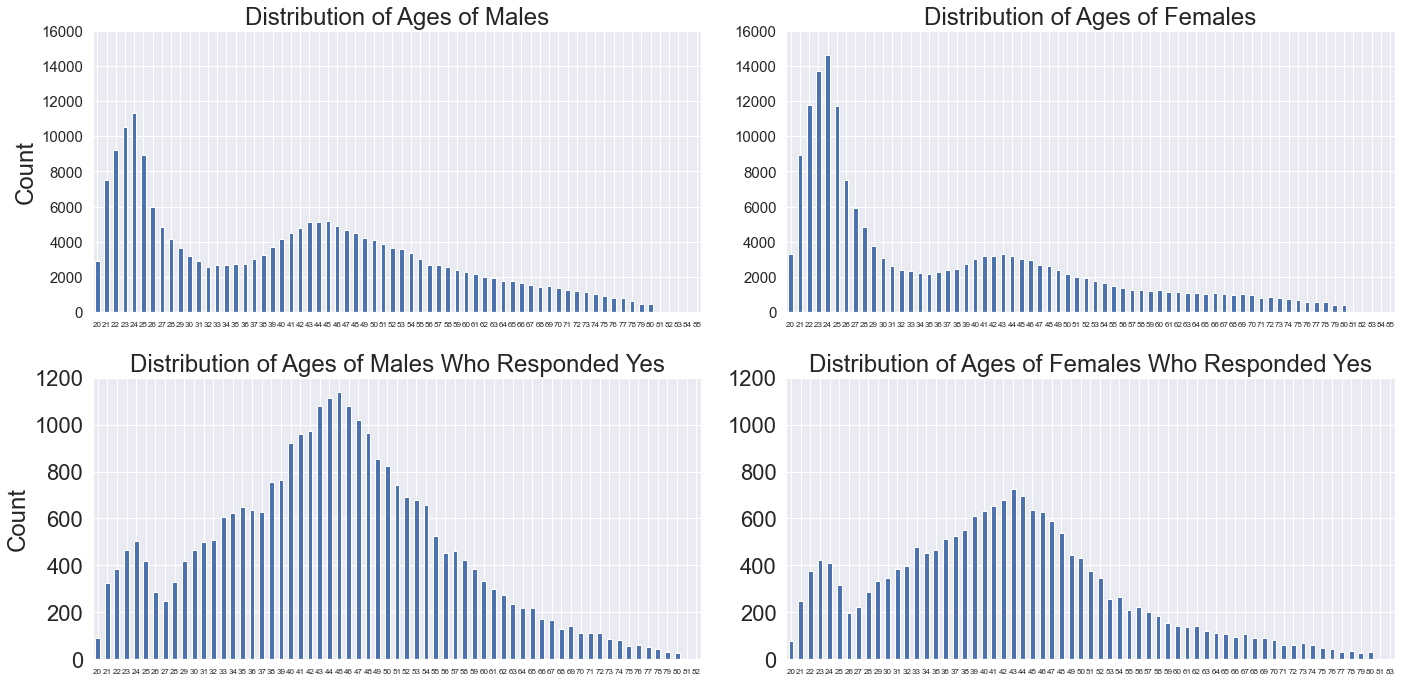

In [12]:
x_font_size = 8
y_font_size = 15
top_yticks = [0,2000,4000,6000,8000,10000,12000,14000,16000]
bottom_yticks = [0,200,400,600,800,1000,1200]

fig, axs = plt.subplots(2, 2, sharex=False, sharey=False)
# Top left
df['Age'][df['Gender'] == 'Male'].value_counts(sort=False).plot.bar(ax = axs[0,0])
axs[0,0].set_title('Distribution of Ages of Males')
axs[0,0].set_ylabel('Count')
plt.sca(axs[0,0])
plt.xticks(fontsize = x_font_size, rotation=0) 
plt.yticks(top_yticks, fontsize = y_font_size)
# Top right
df['Age'][df['Gender'] != 'Male'].value_counts(sort=False).plot.bar(ax = axs[0,1])
axs[0,1].set_title('Distribution of Ages of Females')
plt.sca(axs[0,1])
plt.xticks(fontsize = x_font_size, rotation=0) 
plt.yticks(top_yticks, fontsize = y_font_size)
# Bottom left
df['Age'][(df['Gender'] == 'Male') & df['Response'] == 1].value_counts(sort=False).sort_index().plot.bar(ax = axs[1,0])
axs[1,0].set_title('Distribution of Ages of Males Who Responded Yes')
axs[1,0].set_ylabel('Count')
plt.sca(axs[1,0])
plt.xticks(fontsize = x_font_size, rotation=0) 
plt.yticks(bottom_yticks)
# Bottom right
df['Age'][(df['Gender'] != 'Male') & df['Response'] == 1].value_counts(sort=False).sort_index().plot.bar(ax = axs[1,1])
axs[1,1].set_title('Distribution of Ages of Females Who Responded Yes')
plt.sca(axs[1,1])
plt.xticks(fontsize = x_font_size, rotation=0) 
plt.yticks(bottom_yticks)
plt.tight_layout();

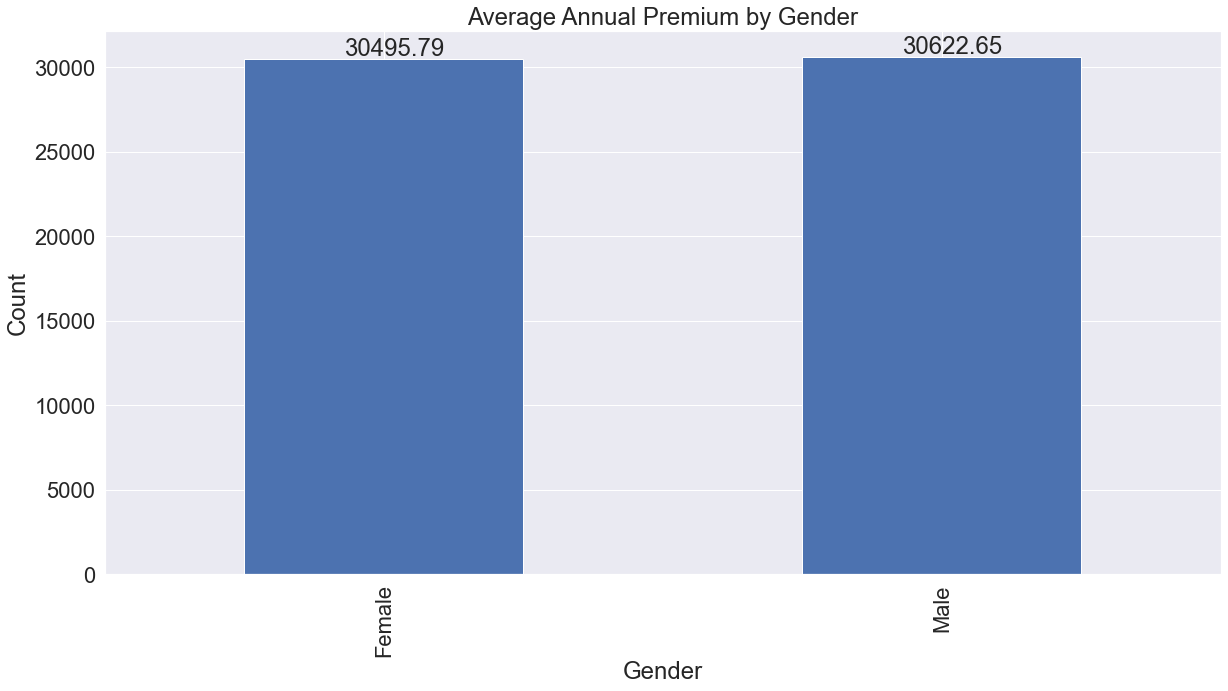

In [13]:
ax = df.groupby(['Gender'])['Annual_Premium'].mean().plot.bar()
for i, col in enumerate(ax.patches):
    ax.text(col.get_x()+.18, col.get_height() + 200, df.groupby(['Gender'])['Annual_Premium'].mean().round(2)[i])
plt.title('Average Annual Premium by Gender')
plt.ylabel('Count');

<h1> Final preprocessing and cleaning </h1>

<b> Balancing the data set </b>

From the calculations above, there is a big imbalance of how many observations were observed to be not interested and how many were observed to be interested (12% of the observations were interested). In order to balance the data set, we are presented with a couple different options. 
1. Oversample the minority class
2. Undersample the majority class
3. Create synthetic data using SMOTE

Below we are going to pre-make four different datasets that we will be using for our models. 

<b>Four datasets</b> <br>
    1. Dataset converted all categorial values to numeric using dummy variables<br>
    2. Dataset with dummy variables and scaled data<br>
    3. Dataset converted all categorical values to numeric using encoders<br>
    4. Dataset with encoded variables and scaled data<br>

<b> Dataset 1 </b> <br>
Convert categorical data into dummy variables

In [14]:
df1 = df.copy() # Copy the original dataset
df1 = pd.get_dummies(df1, drop_first=True)
df1.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0
2,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1
3,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0
4,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0


<b> Dataset 2 </b> <br>
Convert categorical data into dummy variables and scale the data

In [15]:
df2 = df1.copy() # Copy the first dataset
min_max_scaler = MinMaxScaler()
columns = ['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']
df2[columns] = min_max_scaler.fit_transform(df2[columns])
df2.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,0.369231,1,0.538462,0,0.070366,0.154321,0.716263,1,1,0,1,1
1,0.861538,1,0.057692,0,0.057496,0.154321,0.598616,0,1,0,0,0
2,0.415385,1,0.538462,0,0.066347,0.154321,0.058824,1,1,0,1,1
3,0.015385,1,0.211538,1,0.048348,0.932099,0.667820,0,1,1,0,0
4,0.138462,1,0.788462,1,0.046259,0.932099,0.100346,0,0,1,0,0


<b> Dataset 3 </b> <br>
Convert categorical data using label encoding

In [16]:
# Create encoder objects
le_gender = LabelEncoder()
le_va = LabelEncoder()
le_vd = LabelEncoder()

df3 = df.copy() 

# Encode all the columns that are strings
df3['Gender_n'] = le_gender.fit_transform(df3['Gender'])
df3['Vehicle_Age_n'] = le_va.fit_transform(df3['Vehicle_Age'])
df3['Vehicle_Damage_n'] = le_vd.fit_transform(df3['Vehicle_Damage'])
    
# Drop all the old columns 
df3 = df3.drop(['Gender','Vehicle_Age','Vehicle_Damage'], axis='columns')
df3.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_n,Vehicle_Age_n,Vehicle_Damage_n
0,44,1,28.0,0,40454.0,26.0,217,1,1,2,1
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0
2,47,1,28.0,0,38294.0,26.0,27,1,1,2,1
3,21,1,11.0,1,28619.0,152.0,203,0,1,1,0
4,29,1,41.0,1,27496.0,152.0,39,0,0,1,0


<b> Dataset 4 </b> <br>
Convert categorical data using label encoding and scaled data

In [17]:
df4 = df3.copy()
df4[columns] = min_max_scaler.fit_transform(df4[columns])
df4.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_n,Vehicle_Age_n,Vehicle_Damage_n
0,0.369231,1,0.538462,0,0.070366,0.154321,0.716263,1,1,2,1
1,0.861538,1,0.057692,0,0.057496,0.154321,0.598616,0,1,0,0
2,0.415385,1,0.538462,0,0.066347,0.154321,0.058824,1,1,2,1
3,0.015385,1,0.211538,1,0.048348,0.932099,0.667820,0,1,1,0
4,0.138462,1,0.788462,1,0.046259,0.932099,0.100346,0,0,1,0


<h1> Machine Learning </h1>

The machine learning algorithms we are going to be using will be categorical naive bayes and categorical classification trees. We decided to chose these two algorithms because they are both fast and easy to train with the large amount of data we have.

<h2> Naive Bayes </h2>

The first algorithm we used is Naive Bayes. In particular, categorical Naive Bayes. Naive Bayes is also good for determining a baseline to compare other classifier algorithms too. For each of our algorithms, we will be showing the differences in using using an unbalanced data set, and balanced data set. The two balancing methods we use are SMOTE (Synthetic Minority Over-sampling Technique) and undersampling the majority class.

<h3>Un-balanced Dataset </h3>

Below we show what happens when we have a very imbalanced training set

In [179]:
# This function is used to graph the different metrics of our different machine learning models

def graphMLModels(model, name_of_model, scores=False, balanced=None):
    fig, axs = plt.subplots(2, 4, sharex=False, sharey=False)
    labels = ['Accuracy', 'Precision', 'Recall', 'F-score', 'AUC']
    scores_list = []

    # Loop through the 5 datasets
    for i in range(1,5):
        scores = []
        target = 'Response'
        if i == 1:  
            predictors = df1.columns[df1.columns != 'Response']
            X = df1[predictors] 
            y = df1[target]   
            model_num = 'one'
        elif i == 2:
            predictors = df2.columns[df2.columns != 'Response']
            X = df2[predictors] 
            y = df2[target]  
            model_num = 'two'
        elif i == 3:
            predictors = df3.columns[df3.columns != 'Response']
            X = df3[predictors] 
            y = df3[target]   
            model_num = 'three'
        else: # i == 4
            predictors = df4.columns[df4.columns != 'Response']
            X = df4[predictors] 
            y = df4[target]   
            model_num = 'four'

        # Split the data
        X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

        if (balanced == 'Undersample'):
            # Join the training sets together again
            temp_df = X_train_temp.join(y_train_temp)
            # Get all the rows where the response is 1
            minority_rows = temp_df[temp_df['Response'] == 1]
            # Get the count of those rows
            minority_count = minority_rows.shape[0]
            # Get a sample of the observations in the dataset that indicate they are not interested
            majority_rows = temp_df[temp_df['Response'] == 0].sample(minority_count, replace=False, random_state=0)
            # Join the two sets together
            df_balanced = pd.concat([majority_rows, minority_rows])
            # Shuffle the observations
            df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)
            # Remove the response from the balanced dataset
            X_train = df_balanced[df_balanced.columns[df_balanced.columns != 'Response']]
            y_train = df_balanced['Response']
        elif (balanced == 'SMOTE'):
            # Use SMOTE to upsample the training data
            smt = SMOTE(n_jobs=-1)
            X_train, y_train = smt.fit_sample(X_train_temp, y_train_temp)
        else: # Unbalanced Data
            X_train, y_train = X_train_temp, y_train_temp
            balanced = 'Unbalanced'
        
        # Create and train the model
        clf = model
        clf.fit(X_train, y_train)

        # Make predictions
        y_predict = clf.predict(X_test)

        # Add the scores to the list
        scores.append(accuracy_score(y_test, y_predict).round(4))
        scores.append(precision_score(y_test, y_predict).round(4))
        scores.append(recall_score(y_test, y_predict).round(4))
        scores.append(f1_score(y_test, y_predict).round(4))
        scores.append(roc_auc_score(y_test, y_predict).round(4))
        scores_list.append(scores)

        # Graph metrics
        axs[0,i-1].bar(labels,scores)
        axs[0,i-1].set_title('Data set {}'.format(model_num))
        axs[0,i-1].tick_params(axis='x', labelsize=20, rotation=50)
        axs[0,i-1].set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])

        # Graph confusion matrix
        mat = confusion_matrix(y_test, y_predict) # Confusion Matrix
        sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=['False','True'], yticklabels=['False','True'], ax=axs[1,i-1])
        axs[1,i-1].set_title('Predicted')
        axs[1,i-1].set_ylabel('Actual')

    # Show the results
    plt.suptitle('{} Performance for Each Data Set ({})'.format(name_of_model, balanced), fontsize=40)
    plt.tight_layout()
    plt.show()
    
    # Return the scores if we want
    if scores:
        return scores_list

First, we will be testing Naive Bayes with unbalanced training data

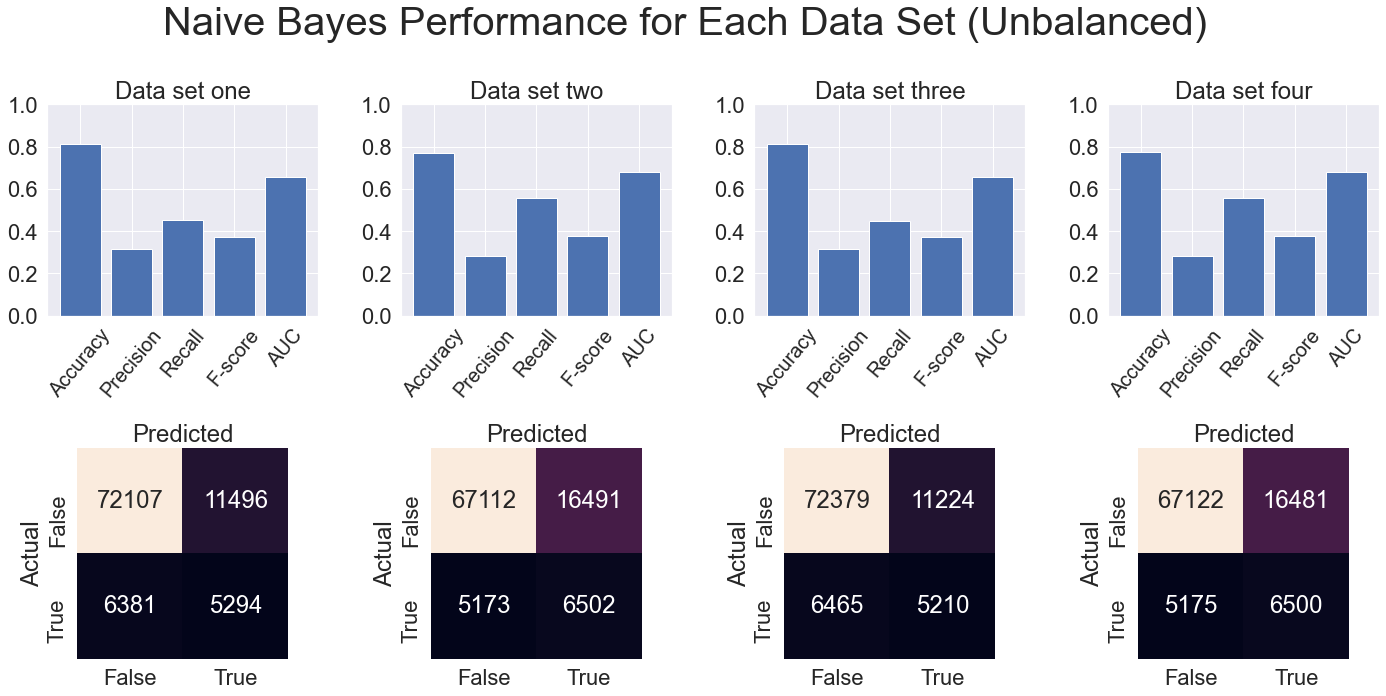

In [180]:
scores_list_ub = graphMLModels(CategoricalNB(), 'Naive Bayes', scores=True)

The metrics from each of the four data sets we created did not produce very good results. All the models produced decent accuracy <b>but</b>, accuracy is not what we are concerned about. Recall and precision scores is what is most useful to know from a business prospective. 

Next, we are going to compute the best metrics for each of the data sets and the average metrics between them.

In [181]:
average_scores_list = [] # List for keeping track of all the average scores

In [182]:
# This function will allow us to print out the best dataset for each metric after testing our models

def getMetrics(scores_list):
    temp_scores = []
    average_accuracy = 0
    average_precision = 0
    average_recall = 0
    average_fscore = 0
    average_auc = 0
    for y in range(4):
        for x in range(5):
            if x == 0:
                average_accuracy += scores_list[y][x]
            if x == 1:
                average_precision += scores_list[y][x]
            if x == 2:
                average_recall += scores_list[y][x]
            if x == 3:
                average_fscore += scores_list[y][x]
            if x == 4:
                average_auc += scores_list[y][x]

    # Add the averages to compare later
    temp_scores.append((average_accuracy / 4))
    temp_scores.append((average_precision / 4))
    temp_scores.append((average_recall / 4))
    temp_scores.append((average_fscore / 4))
    temp_scores.append((average_auc / 4))

    print("Highest accuracy: \t{} Dataset {}".format(max(np.array(scores_list)[:,0]), np.where(np.array(scores_list)[:,0] == max(np.array(scores_list)[:,0]))[0][0] + 1))
    print("Highest precision: \t{} Dataset {}".format(max(np.array(scores_list)[:,1]), np.where(np.array(scores_list)[:,1] == max(np.array(scores_list)[:,1]))[0][0] + 1))
    print("Highest recall: \t{} Dataset {}".format(max(np.array(scores_list)[:,2]), np.where(np.array(scores_list)[:,2] == max(np.array(scores_list)[:,2]))[0][0] + 1))
    print("Highest f-score: \t{} Dataset {}".format(max(np.array(scores_list)[:,3]), np.where(np.array(scores_list)[:,3] == max(np.array(scores_list)[:,3]))[0][0] + 1))
    print("Highest AUC: \t\t{} Dataset {}".format(max(np.array(scores_list)[:,4]), np.where(np.array(scores_list)[:,4] == max(np.array(scores_list)[:,4]))[0][0] + 1))

    print("Average accuracy: \t{:.2f}%".format((average_accuracy / 4)*100))
    print("Average precision: \t{:.2f}%".format((average_precision / 4)*100))
    print("Average recall: \t{:.2f}%".format((average_recall / 4)*100))
    print("Average f-score: \t{:.2f}%".format((average_fscore / 4)*100))
    print("Average AUC: \t\t{:.2f}%".format((average_auc / 4)*100))
    
    return temp_scores

In [183]:
temp_scores = getMetrics(scores_list_ub)
average_scores_list.append(temp_scores)

Highest accuracy: 	0.8143 Dataset 3
Highest precision: 	0.317 Dataset 3
Highest recall: 	0.5569 Dataset 2
Highest f-score: 	0.3751 Dataset 2
Highest AUC: 		0.6798 Dataset 2
Average accuracy: 	79.30%
Average precision: 	29.95%
Average recall: 	50.33%
Average f-score: 	37.32%
Average AUC: 		66.84%


With an unbalanced training set, our accuracy is decent but the metrics we are most interesting in improving are not. Our average recall score was around 50% and the precision around 30%. Data set 3 produced the highest precision score of 31% and data set 2 produced the highest recall, f-score, and AUC scores. 

<h3>Balanced Datasets </h3> 
<b>SMOTE</b> <br>
Next, we will show how much of a difference balancing the training set of data will improve the overall models. The first balancing technique we are going to be using is SMOTE. SMOTE works by up-sampling the minority class by creating synthetic data using a kNN algorithm that picks a random point in the minority class and creates a new observation using the averages of that points neighbors who are also in the minority class. We only apply SMOTE to the training data and not the whole data set.  

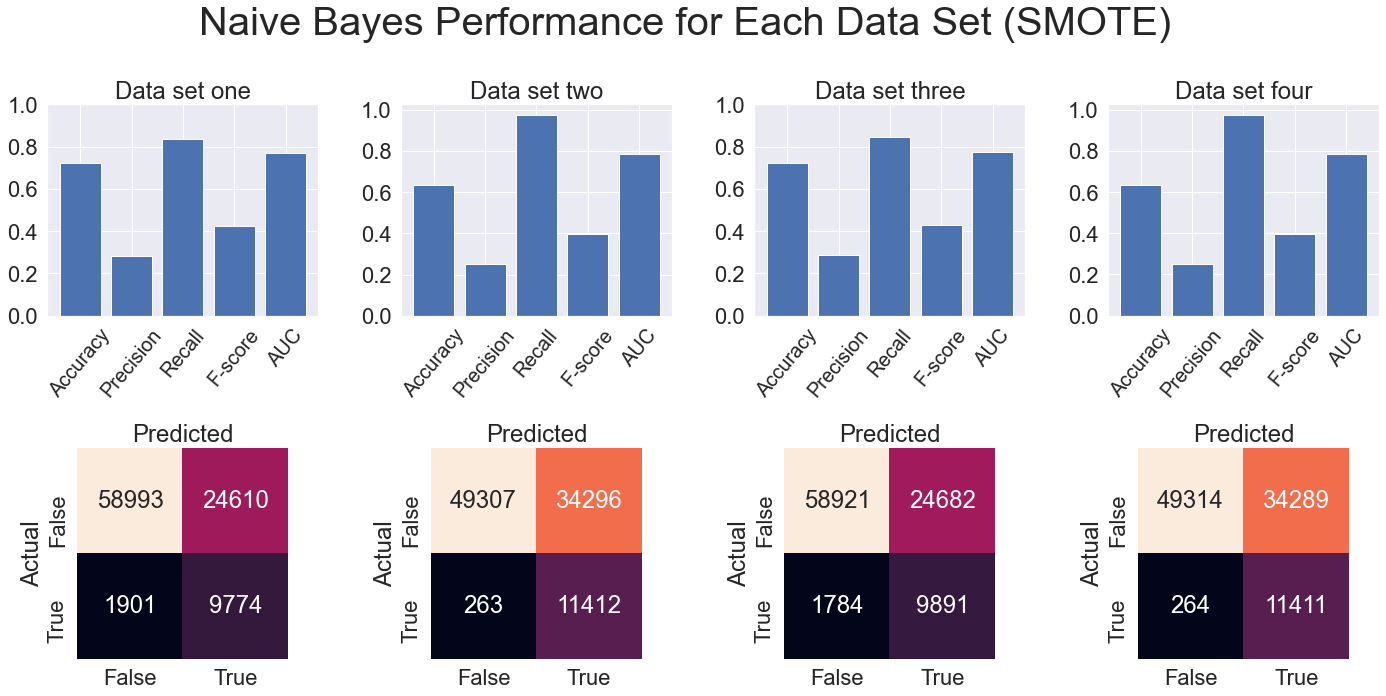

In [184]:
scores_list_smote = graphMLModels(CategoricalNB(), 'Naive Bayes', scores=True, balanced='SMOTE')

In [185]:
temp_scores = getMetrics(scores_list_smote)
average_scores_list.append(temp_scores)

Highest accuracy: 	0.7222 Dataset 3
Highest precision: 	0.2861 Dataset 3
Highest recall: 	0.9775 Dataset 2
Highest f-score: 	0.4277 Dataset 3
Highest AUC: 		0.7836 Dataset 2
Average accuracy: 	67.96%
Average precision: 	26.75%
Average recall: 	90.98%
Average f-score: 	41.19%
Average AUC: 		77.86%


Compared to the performance of the last models, the highest recall, f-score, and AUC increased (with the recall being the most significant increase). And the highest accuracy and precision decreased.

<b>Undersampling the majority class</b>

The next balancing technique used is to undersample the majority class. We do this by randomly selecting enough observations in the majority class to match the minority class in the training data. This allows us to have an equal amount of target responses in our training data. 

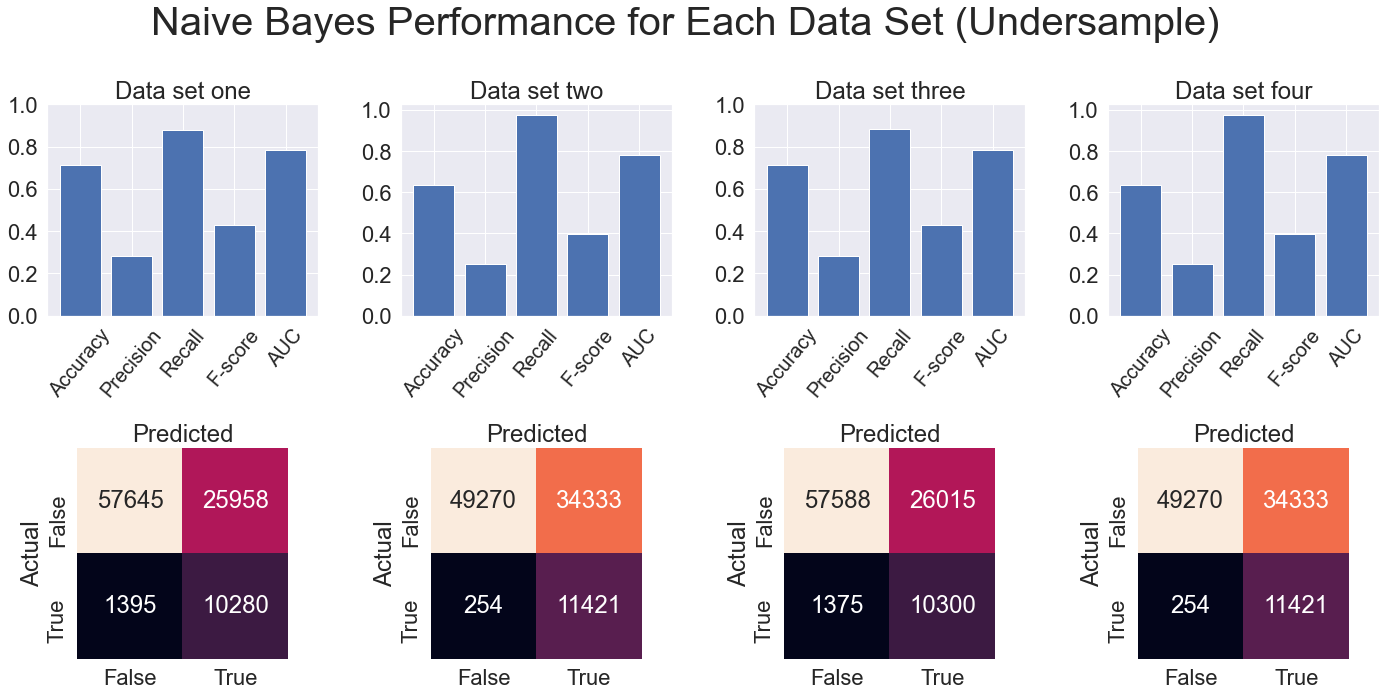

In [186]:
scores_list_us = graphMLModels(CategoricalNB(), 'Naive Bayes', scores=True, balanced='Undersample')

In [187]:
temp_scores = getMetrics(scores_list_us)
average_scores_list.append(temp_scores)

Highest accuracy: 	0.7129 Dataset 1
Highest precision: 	0.2837 Dataset 1
Highest recall: 	0.9782 Dataset 2
Highest f-score: 	0.4293 Dataset 3
Highest AUC: 		0.7855 Dataset 3
Average accuracy: 	67.48%
Average precision: 	26.66%
Average recall: 	92.98%
Average f-score: 	41.34%
Average AUC: 		78.45%


When undersamping the majority class, we were able to slightly improve the recall, f-score, and AUC compared to using SMOTE.

Below is three graphs comparing the averages all the metrics for each of the balancing technique.

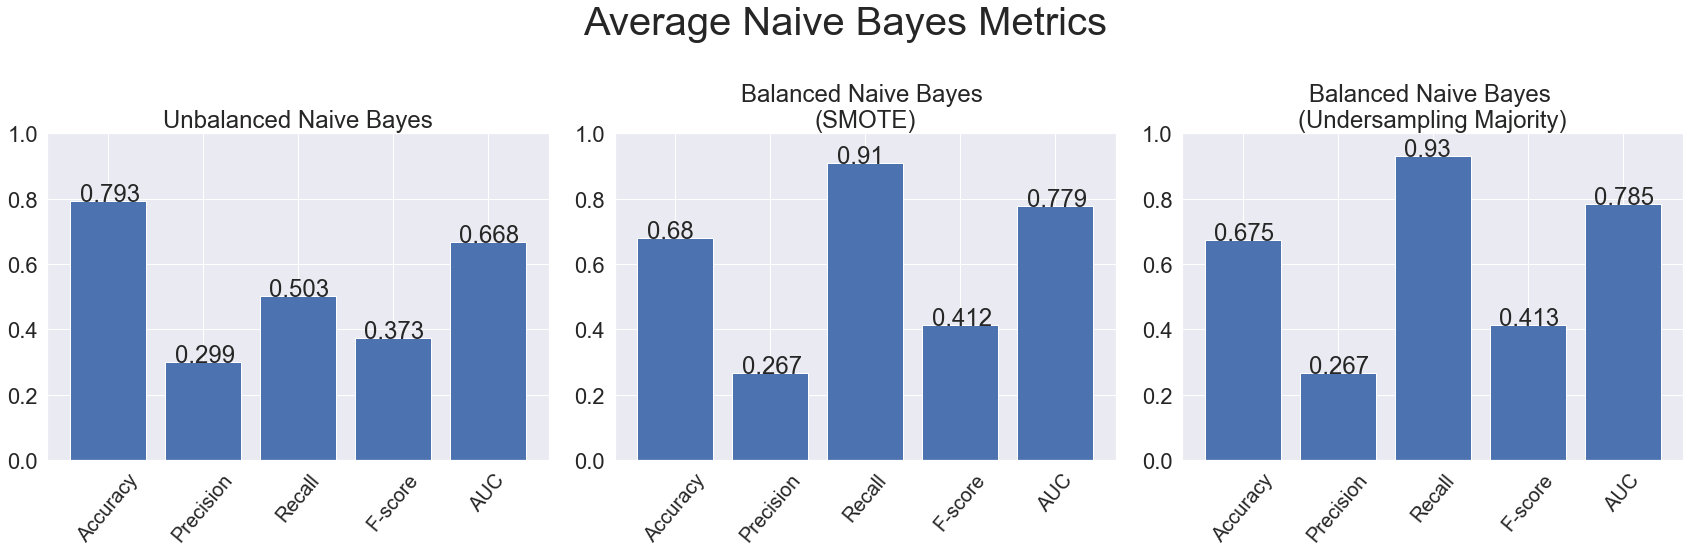

In [189]:
labels = ['Accuracy', 'Precision', 'Recall', 'F-score', 'AUC']
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))

ax1.bar(labels,average_scores_list[0])
for i, col in enumerate(ax1.patches):
    ax1.text(col.get_x()+0.1, col.get_height(), average_scores_list[0][i].round(3))
ax1.tick_params(axis='x', labelsize=20, rotation=50)
ax1.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax1.set_title('Unbalanced Naive Bayes')
    
ax2.bar(labels,average_scores_list[1])
for i, col in enumerate(ax2.patches):
    ax2.text(col.get_x()+0.1, col.get_height(), average_scores_list[1][i].round(3))
ax2.tick_params(axis='x', labelsize=20, rotation=50)
ax2.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax2.set_title('Balanced Naive Bayes \n(SMOTE)')
    
ax3.bar(labels,average_scores_list[2])
for i, col in enumerate(ax3.patches):
    ax3.text(col.get_x()+0.1, col.get_height(), average_scores_list[2][i].round(3))
ax3.tick_params(axis='x', labelsize=20, rotation=50)
ax3.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax3.set_title('Balanced Naive Bayes \n(Undersampling Majority)')

plt.suptitle('Average Naive Bayes Metrics', fontsize=40)
plt.tight_layout();

While both balancing methods offered similar results, undersampling the majority produced slightly better results for the recall score. <br>
Looking back at which of the four datasets when using the undersampling technique, data set 2 (df2) produced the highest recall score. <br>
Next, we are going to try to improve the precision of our Naive Bayes model, using data set 2, by applying a threshold on the probability 

In [28]:
def ClassificationProbThreshold(model, dataframe, predictors, target, threshold=0.5):
    
    # Split the data 75% train, 25% test
    X_train_temp, X_test, y_train_temp, y_test = train_test_split(dataframe[predictors], dataframe[target], test_size=0.25, random_state=0)
    
    #X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

    # Join the training sets together again
    temp_df = X_train_temp.join(y_train_temp)

    # Get all the rows where the response is 1
    minority_rows = temp_df[temp_df['Response'] == 1]
    # Get the count of those rows
    minority_count = minority_rows.shape[0]
    # Get a sample of the observations in the dataset that indicate they are not interested
    majority_rows = temp_df[temp_df['Response'] == 0].sample(minority_count, replace=False, random_state=0)
    # Join the two sets together
    df_balanced = pd.concat([majority_rows, minority_rows])
    # Shuffle the observations
    df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)
    # Remove the response from the balanced dataset
    X_train = df_balanced[df_balanced.columns[df_balanced.columns != 'Response']]
    y_train = df_balanced['Response']
    
    # Create the Classification Object
    clf = model
    
    # Train the data
    clf.fit(X_train, y_train)
    # Make predictions
    predictions = clf.predict(X_test)

    # Create probabilities
    prob = clf.predict_proba(X_test)[:,1]
    y_predict = (prob > threshold).astype(int)
    
    cm = confusion_matrix(y_test, y_predict) 
    # Create the precision and recall
    if (cm[0,1] + cm[1,1]) == 0:
        precision = 0
    else:
        precision = cm[1,1] / (cm[0,1] + cm[1,1])
    if (cm[1,0] + cm[1,1]) == 0:
        recall = 0
    else:
        recall = cm[1,1] / (cm[1,0] + cm[1,1])
    
    return precision, recall, f1_score(y_test, y_predict).round(4)

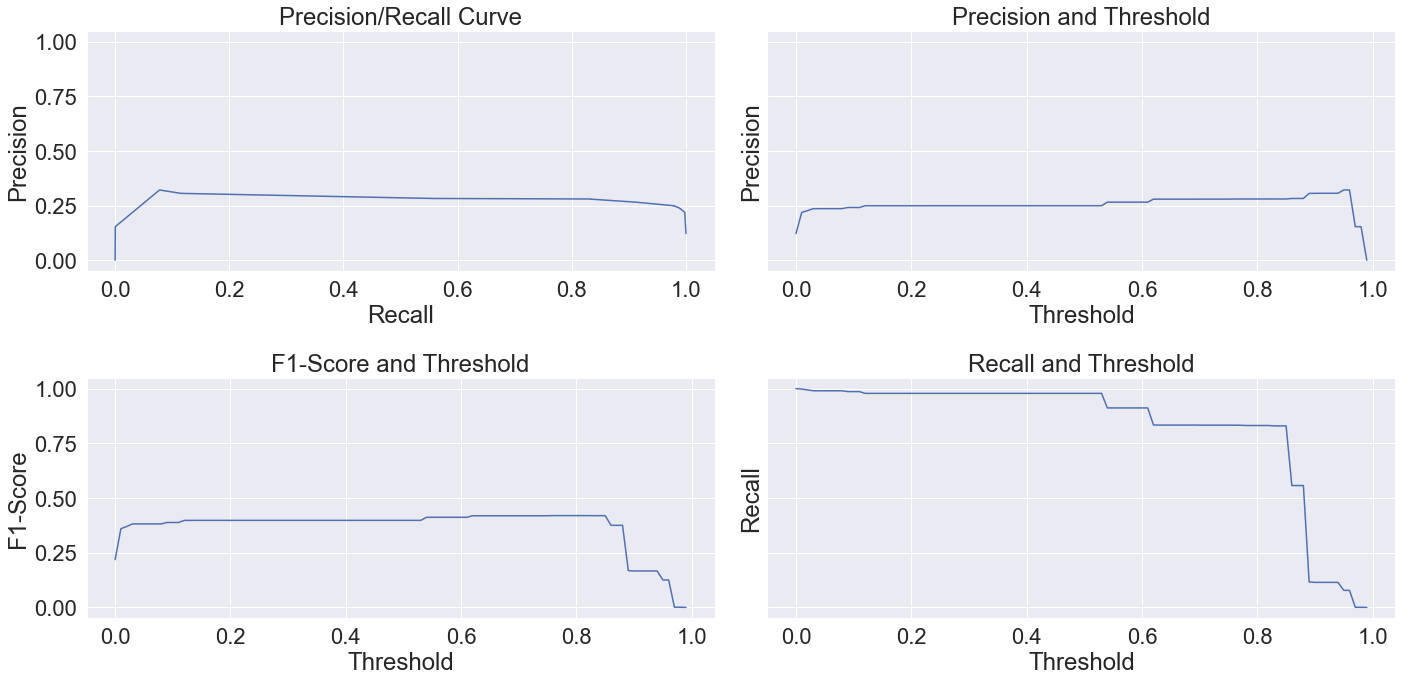

In [29]:
precision_list = []
recall_list = []
f1_list = []

# Loop through all the thresholds from 0.00 to 0.99
for i in range(0,100):
    p, r, f1 = ClassificationProbThreshold(CategoricalNB(), df2, df2.columns[df2.columns != 'Response'], 'Response', threshold=i/100)
    precision_list.append(p)
    recall_list.append(r)
    f1_list.append(f1)

threshold_list = np.arange(0,100) / 100
fig, axs = plt.subplots(2, 2, sharey=True)
axs[0, 0].plot(recall_list, precision_list)
axs[0, 0].set_title('Precision/Recall Curve')
axs[0, 0].set_xlabel('Recall')
axs[0, 0].set_ylabel('Precision')
axs[0, 1].plot(threshold_list, precision_list)
axs[0, 1].set_title('Precision and Threshold')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_xlabel('Threshold')
axs[1, 0].plot(threshold_list, f1_list)
axs[1, 0].set_title('F1-Score and Threshold')
axs[1, 0].set_ylabel('F1-Score')
axs[1, 0].set_xlabel('Threshold')
axs[1, 1].plot(threshold_list, recall_list)
axs[1, 1].set_title('Recall and Threshold')
axs[1, 1].set_xlabel('Threshold')
axs[1, 1].set_ylabel('Recall')
plt.tight_layout();

The four graphs above shows us that even as we manually adjust our threshold value, our precision never goes higher than around 30-35% or so. 

<b>Finding the best threshold<b>

To find the best threshold, we will get the threshold at the highest F-Score using the second data set (df2) and undersampling the majority class

Because our threshold values goes from 0.00 to 0.99, this allows us to be able to find the index of the max f-score and use that location as our best threshold

In [30]:
# Because our threshold values goes from 0.00 to 0.99, this allows us to be able to find the index of the max f-score and use that location as our best threshold
thresh = np.where(max(f1_list) == f1_list)[0][0]
print("The threshold with the highest f-score:",thresh)

76

The threshold of 0.76 gave us the best f-score. Below we will now create our last Naive Bayes model with the new threshold

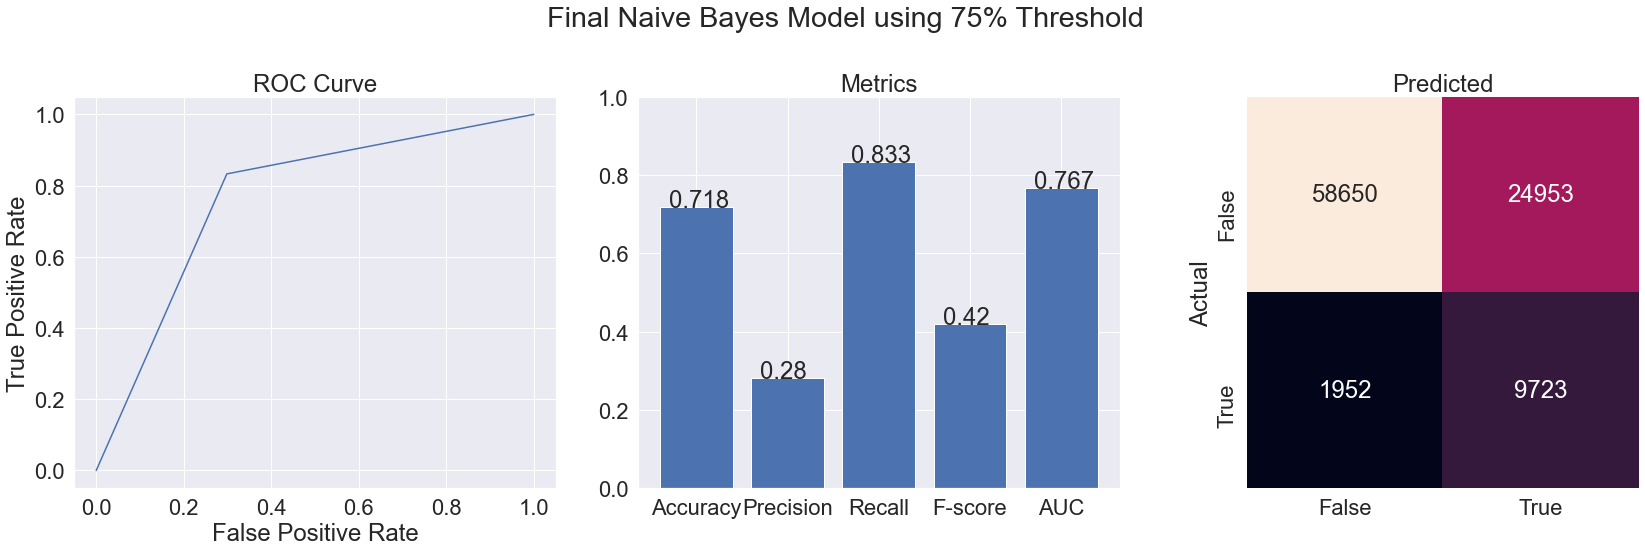

In [31]:
target = 'Response'
labels = ['Accuracy', 'Precision', 'Recall', 'F-score', 'AUC']
scores = []

predictors = df2.columns[df2.columns != 'Response']
X = df2[predictors] 
y = df2[target] 

X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Join the training sets together again
temp_df = X_train_temp.join(y_train_temp)

# Get all the rows where the response is 1
minority_rows = temp_df[temp_df['Response'] == 1]
# Get the count of those rows
minority_count = minority_rows.shape[0]
# Get a sample of the observations in the dataset that indicate they are not interested
majority_rows = temp_df[temp_df['Response'] == 0].sample(minority_count, replace=False, random_state=0)
# Join the two sets together
df_balanced = pd.concat([majority_rows, minority_rows])
# Shuffle the observations
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)
# Remove the response from the balanced dataset
X_train = df_balanced[df_balanced.columns[df_balanced.columns != 'Response']]
y_train = df_balanced['Response']

# Create and train the model
clf = CategoricalNB()
clf.fit(X_train.values, y_train.values)

# Predictions and probability of all predictions
threshold = 0.76
prob = clf.predict_proba(X_test.values)[:,1]
y_predict = (prob > threshold).astype(int)

# Code for ROC curve
fpr, tpr, _ = roc_curve(y_test.values, y_predict)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

# Add all the metrics scores to a list to graph 
scores.append(accuracy_score(y_test, y_predict).round(4))
scores.append(precision_score(y_test, y_predict).round(4))
scores.append(recall_score(y_test, y_predict).round(4))
scores.append(f1_score(y_test, y_predict).round(4))
scores.append(roc_auc_score(y_test, y_predict).round(4))

# Plot both
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))
roc_display.plot(ax=ax1) # ROC
ax2.bar(labels,scores)
for i, col in enumerate(ax2.patches):
    ax2.text(col.get_x()+0.1, col.get_height(), scores[i].round(3))
ax2.set_title('Metrics')
ax2.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
mat = confusion_matrix(y_test, y_predict) # Confusion Matrix
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['False','True'], yticklabels=['False','True'], 
            ax=ax3)
ax1.set_title('ROC Curve')
ax3.set_title('Predicted')
ax3.set_ylabel('Actual')
plt.suptitle('Final Naive Bayes Model using 75% Threshold')
plt.tight_layout();

<h2> Classification Tree </h2>

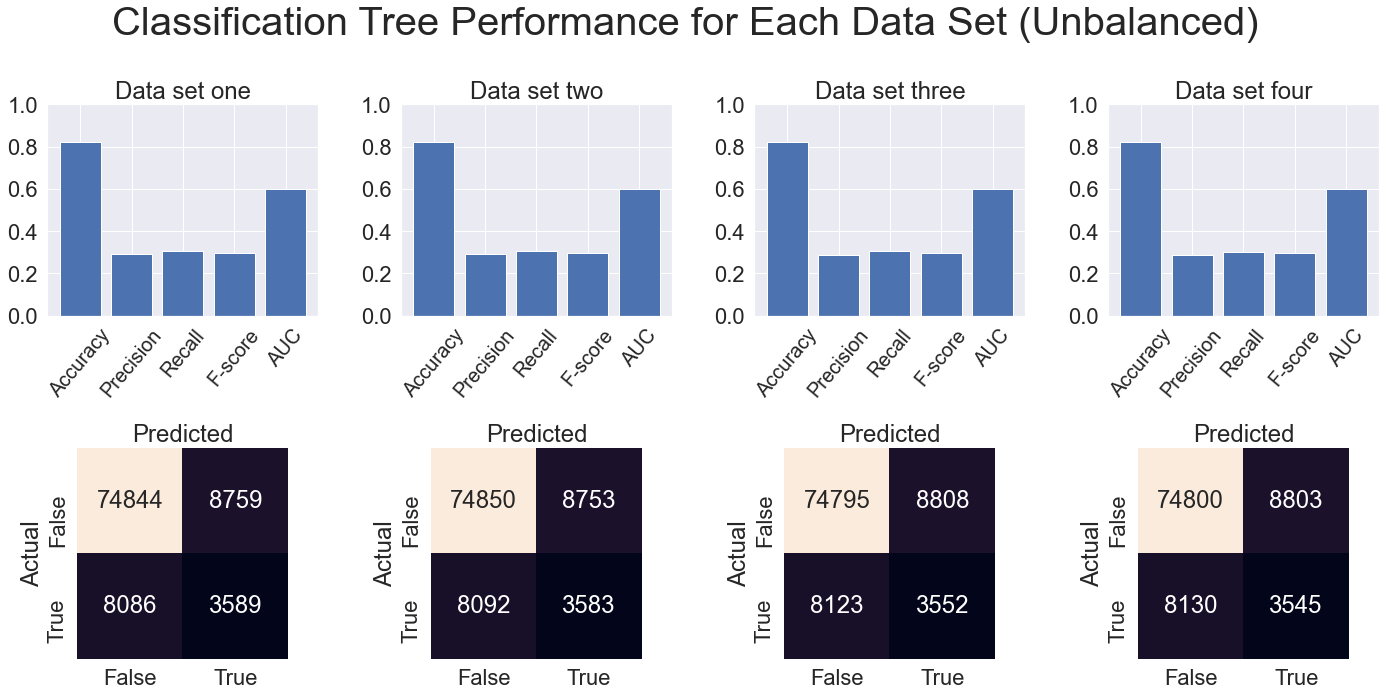

In [32]:
graphMLModels(DecisionTreeClassifier(random_state=0), 'Classification Tree');

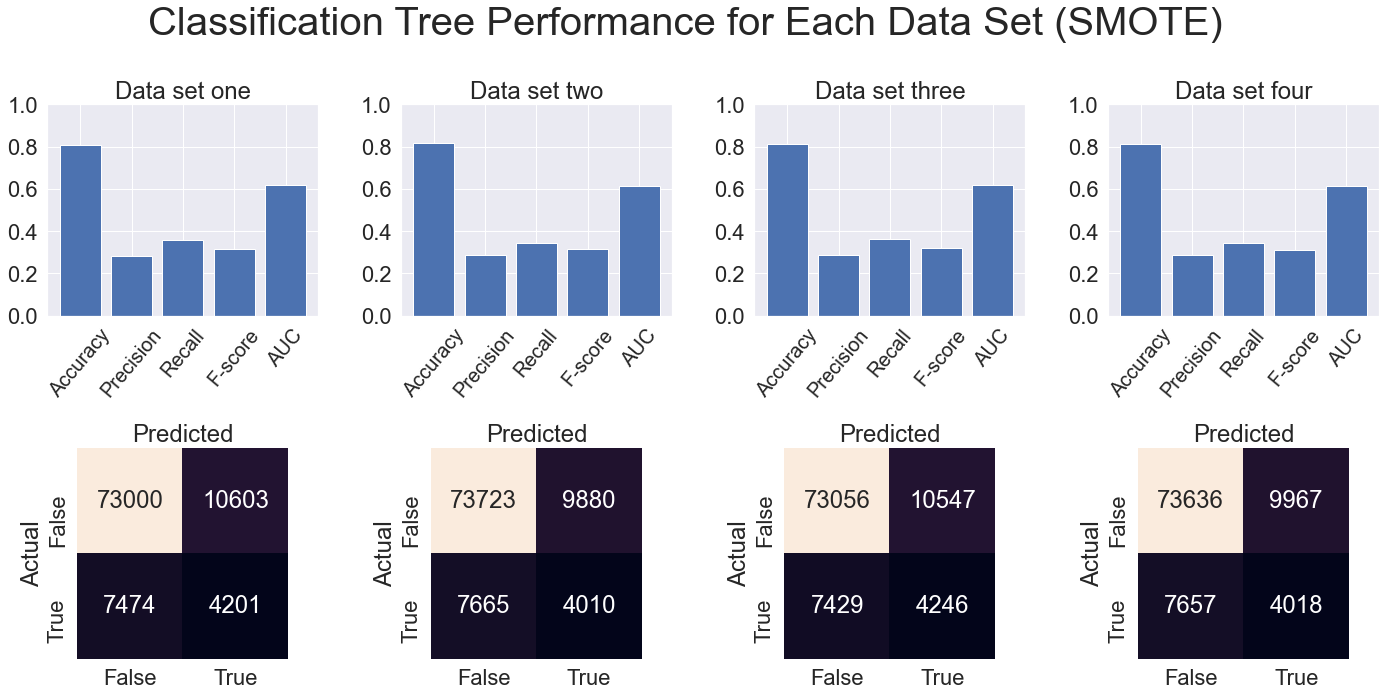

In [36]:
graphMLModels(DecisionTreeClassifier(random_state=0), 'Classification Tree', balanced='SMOTE');

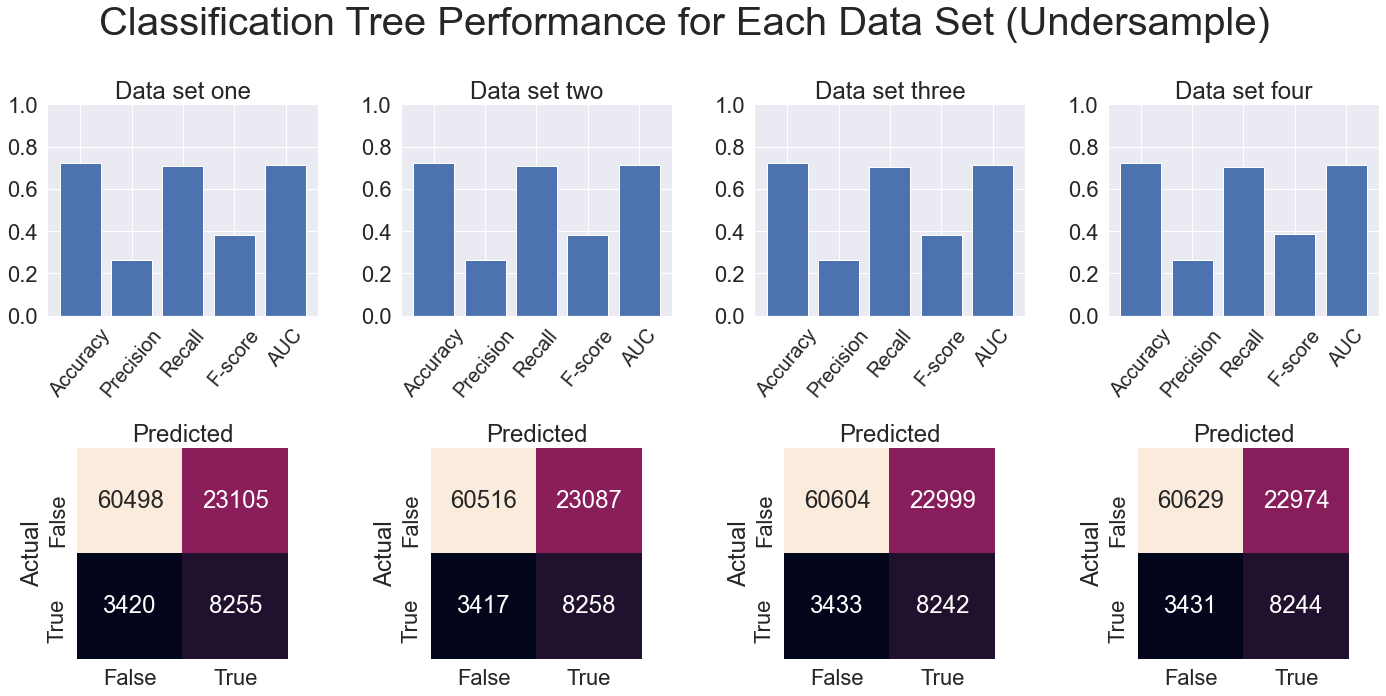

In [35]:
graphMLModels(DecisionTreeClassifier(random_state=0), 'Classification Tree', balanced='Undersample');

<h3> Optimizing for accuracy </h3>
The first thing to do is do a grid search in order to find useful parameters. We are going to use the 4th dataset because it gave us the highest accuracy of the four datasets

In [65]:
predictors = df4.columns[df4.columns != 'Response']
X = df4[predictors] 
y = df4[target]   

# Split the data
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Join the training sets together again
temp_df = X_train_temp.join(y_train_temp)
# Get all the rows where the response is 1
minority_rows = temp_df[temp_df['Response'] == 1]
# Get the count of those rows
minority_count = minority_rows.shape[0]
# Get a sample of the observations in the dataset that indicate they are not interested
majority_rows = temp_df[temp_df['Response'] == 0].sample(minority_count, replace=False, random_state=0)
# Join the two sets together
df_balanced = pd.concat([majority_rows, minority_rows])
# Shuffle the observations
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)
# Remove the response from the balanced dataset
X_train = df_balanced[df_balanced.columns[df_balanced.columns != 'Response']]
y_train = df_balanced['Response']

params = {'min_samples_split': [2, 3, 4, 5, 6], # Give the model the option to have anywhere between 2 to 6 variables to split
          'max_depth': np.arange(2,10), # Give the max depth anywhere from 2 to 9
          'criterion' : ['gini', 'entropy']} 

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=0), params, verbose=1, cv=5, return_train_score=True, n_jobs=-1)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_params_

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    8.9s finished


{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 6}

Using feature selection

In [66]:
# Create a new model with the best parameters
clf = DecisionTreeClassifier(max_depth=7, criterion='entropy', min_samples_split = 6)

predictors = df4.columns[df4.columns != 'Response']
X = df4[predictors] 
y = df4[target]   

# Split the data
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

temp_df = X_train_temp.join(y_train_temp)
# Get all the rows where the response is 1
minority_rows = temp_df[temp_df['Response'] == 1]
# Get the count of those rows
minority_count = minority_rows.shape[0]
# Get a sample of the observations in the dataset that indicate they are not interested
majority_rows = temp_df[temp_df['Response'] == 0].sample(minority_count, replace=False, random_state=0)
# Join the two sets together
df_balanced = pd.concat([majority_rows, minority_rows])
# Shuffle the observations
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)
# Remove the response from the balanced dataset
X_train = df_balanced[df_balanced.columns[df_balanced.columns != 'Response']]
y_train = df_balanced['Response']

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=6)

In [67]:
temp1 = clf.feature_importances_
temp2 = np.array(df4.columns[df4.columns != 'Response'])
temp1 = temp1.reshape(len(temp1),1)
temp2 = temp2.reshape(len(temp2),1)
result = []
for i in range(10):
    temp = []
    temp.append(temp2[i].flatten()[0])
    temp.append(temp1[i].flatten()[0] * 100)
    result.append(temp)
pd.DataFrame(result, columns=['Feature','Level_of_importance'])

,Feature,Level_of_importance
0,Age,7.325136
1,Driving_License,0.043619
2,Region_Code,0.390386
3,Previously_Insured,80.007264
4,Annual_Premium,0.269041
5,Policy_Sales_Channel,2.564058
6,Vintage,0.226384
7,Gender_n,0.183698
8,Vehicle_Age_n,0.257571
9,Vehicle_Damage_n,8.732843


There are two features that do not contribute at all and 3 features that contribute less than 1%. <br>
We will drop those features and run the decision tree grid search again.

Those features are Driving_license, Region_Code, Annual_Premium, Vintage, Gender_n

In [68]:
def graphDecisionTree(new_cols, labels, threshold=0.5, title=''):
    scores = []
    X = df4[new_cols]
    y = df4[target]

    X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

    # Join the training sets together again
    temp_df = X_train_temp.join(y_train_temp)
    # Get all the rows where the response is 1
    minority_rows = temp_df[temp_df['Response'] == 1]
    # Get the count of those rows
    minority_count = minority_rows.shape[0]
    # Get a sample of the observations in the dataset that indicate they are not interested
    majority_rows = temp_df[temp_df['Response'] == 0].sample(minority_count, replace=False, random_state=0)
    # Join the two sets together
    df_balanced = pd.concat([majority_rows, minority_rows])
    # Shuffle the observations
    df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)
    # Remove the response from the balanced dataset
    X_train = df_balanced[df_balanced.columns[df_balanced.columns != 'Response']]
    y_train = df_balanced['Response']

    # Create a new model with the best parameters
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=6)
    clf.fit(X_train, y_train)

    # Check our predictions and apply thresholds
    prob = clf.predict_proba(X_test.values)[:,1]
    y_predict = (prob > threshold).astype(int)

    # Code for ROC curve
    fpr, tpr, _ = roc_curve(y_test.values, y_predict)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

    # Add all the metrics scores to a list to graph 
    scores.append(accuracy_score(y_test, y_predict).round(4))
    scores.append(precision_score(y_test, y_predict).round(4))
    scores.append(recall_score(y_test, y_predict).round(4))
    scores.append(f1_score(y_test, y_predict).round(4))
    scores.append(roc_auc_score(y_test, y_predict).round(4))

    # Plot both
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))
    roc_display.plot(ax=ax1) # ROC
    ax2.bar(labels,scores)
    for i, col in enumerate(ax2.patches):
        ax2.text(col.get_x()+0.1, col.get_height(), scores[i].round(3))
    ax2.set_title('Metrics')
    ax2.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
    mat = confusion_matrix(y_test, y_predict) # Confusion Matrix
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, 
                xticklabels=['False','True'], yticklabels=['False','True'], 
                ax=ax3)
    ax1.set_title('ROC Curve')
    ax3.set_title('Predicted')
    ax3.set_ylabel('Actual')
    plt.suptitle(title)
    plt.tight_layout();

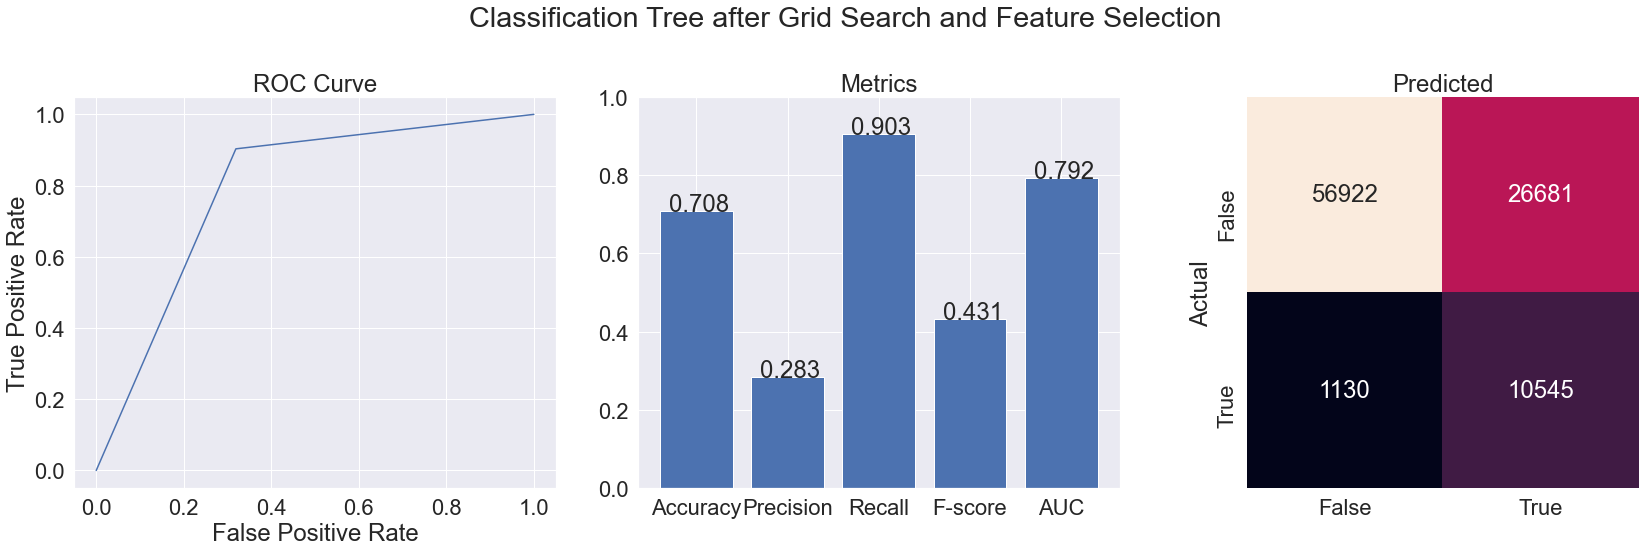

In [69]:
new_cols = ['Age', 'Previously_Insured', 'Policy_Sales_Channel', 'Vehicle_Damage_n']
labels = ['Accuracy', 'Precision', 'Recall', 'F-score', 'AUC']
title = 'Classification Tree after Grid Search and Feature Selection'
graphDecisionTree(new_cols, labels, threshold=0.5, title=title)

Next, we are going to manually compute our own metrics using thresholds from 0% to 99%. 

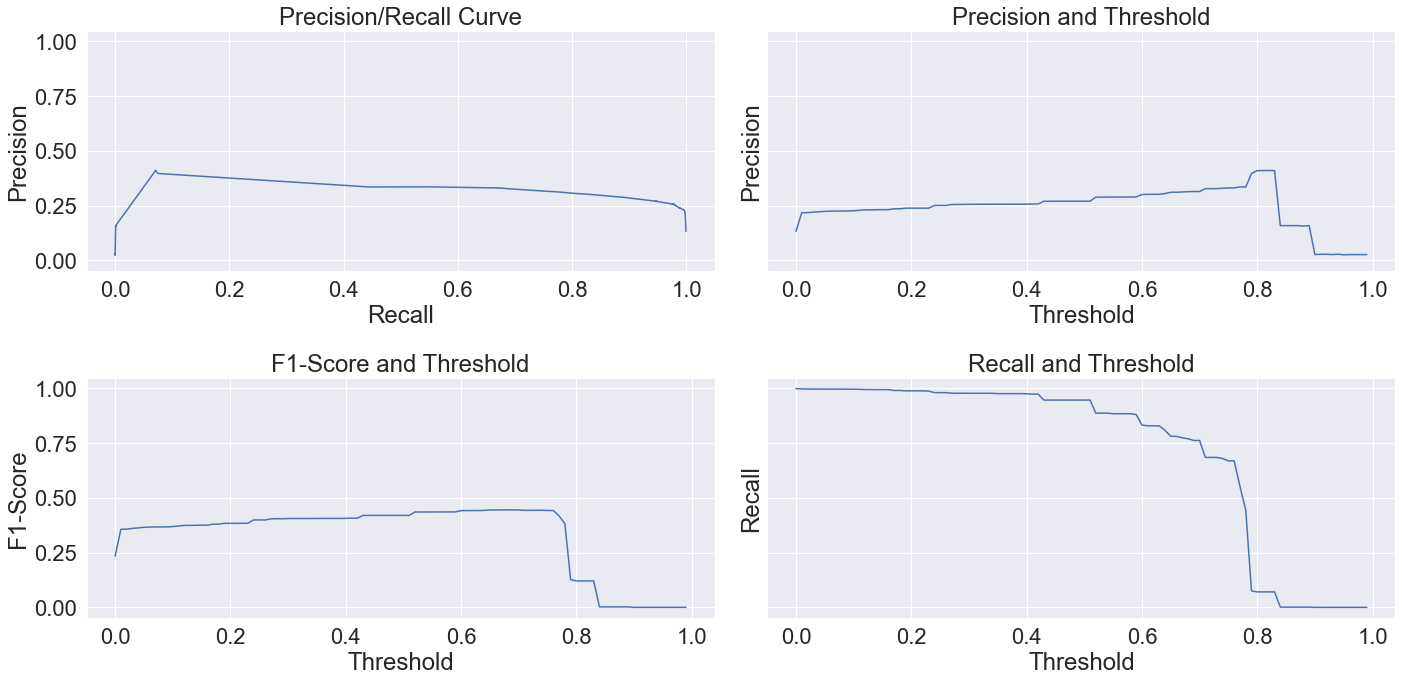

In [70]:
precision_list = []
recall_list = []
f1_list = []

# Loop through all the thresholds from 0.00 to 0.99
for i in range(0,100):
    p, r, f1 = ClassificationProbThreshold(DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=6), df4, df4.columns[df4.columns != 'Response'], 'Response', threshold=i/100)
    precision_list.append(p)
    recall_list.append(r)
    f1_list.append(f1)
    
threshold_list = np.arange(0,100) / 100
fig, axs = plt.subplots(2, 2, sharey=True)
axs[0, 0].plot(recall_list, precision_list)
axs[0, 0].set_title('Precision/Recall Curve')
axs[0, 0].set_xlabel('Recall')
axs[0, 0].set_ylabel('Precision')
axs[0, 1].plot(threshold_list, precision_list)
axs[0, 1].set_title('Precision and Threshold')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_xlabel('Threshold')
axs[1, 0].plot(threshold_list, f1_list)
axs[1, 0].set_title('F1-Score and Threshold')
axs[1, 0].set_ylabel('F1-Score')
axs[1, 0].set_xlabel('Threshold')
axs[1, 1].plot(threshold_list, recall_list)
axs[1, 1].set_title('Recall and Threshold')
axs[1, 1].set_xlabel('Threshold')
axs[1, 1].set_ylabel('Recall')
plt.tight_layout();

Below we are going to be calculating the threshold value of the highest f-score.

In [83]:
thresh = np.where(max(f1_list) == f1_list)[0][0]
print("The threshold with the highest f-score:",thresh)

The threshold with the highest f-score: 68


<em>Applying the new threshold</em>

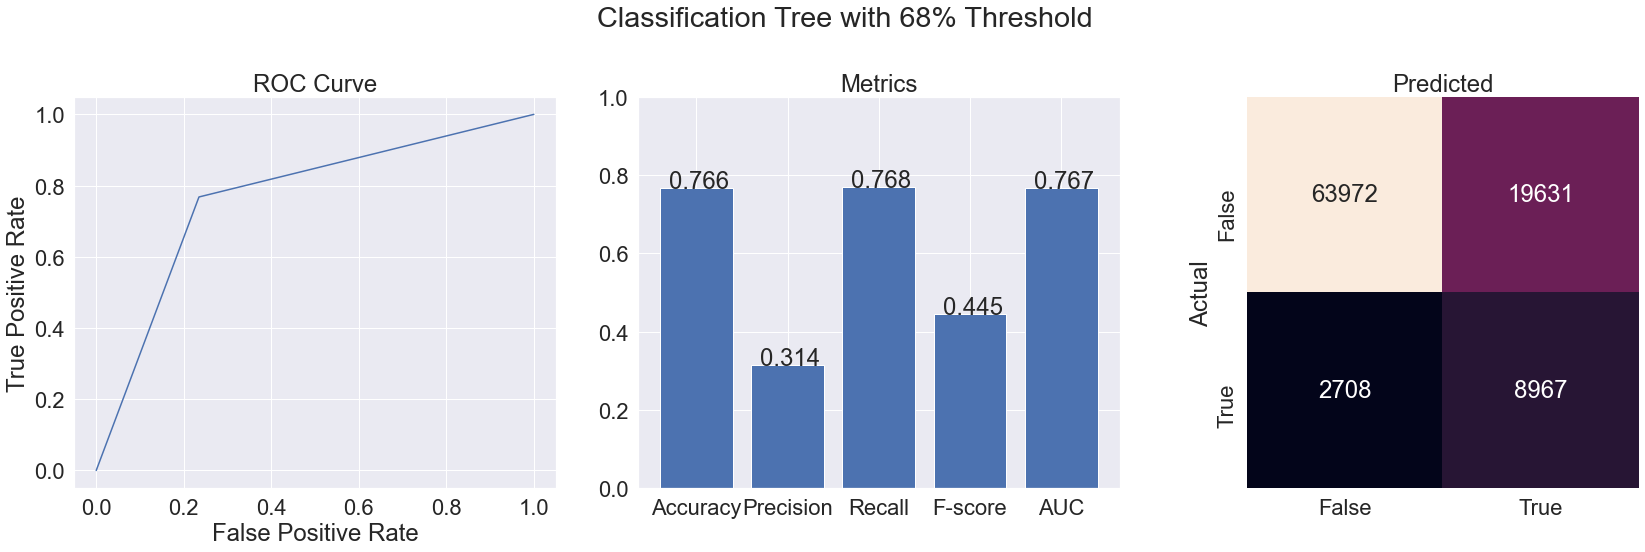

In [72]:
title = 'Classification Tree with 68% Threshold'
new_cols = ['Age', 'Previously_Insured', 'Policy_Sales_Channel', 'Vehicle_Damage_n']
labels = ['Accuracy', 'Precision', 'Recall', 'F-score', 'AUC']
graphDecisionTree(new_cols, labels, threshold=0.68, title=title)

When adjusting the threshold to 68%, we were able to increase the precision of the model from 28% to 31%. But this small raise lowered the recall from 90% to 76%. 

<h3> Validation Curve </h3>

Below we show the validation curve of the recall and accuracy of our decision tree.

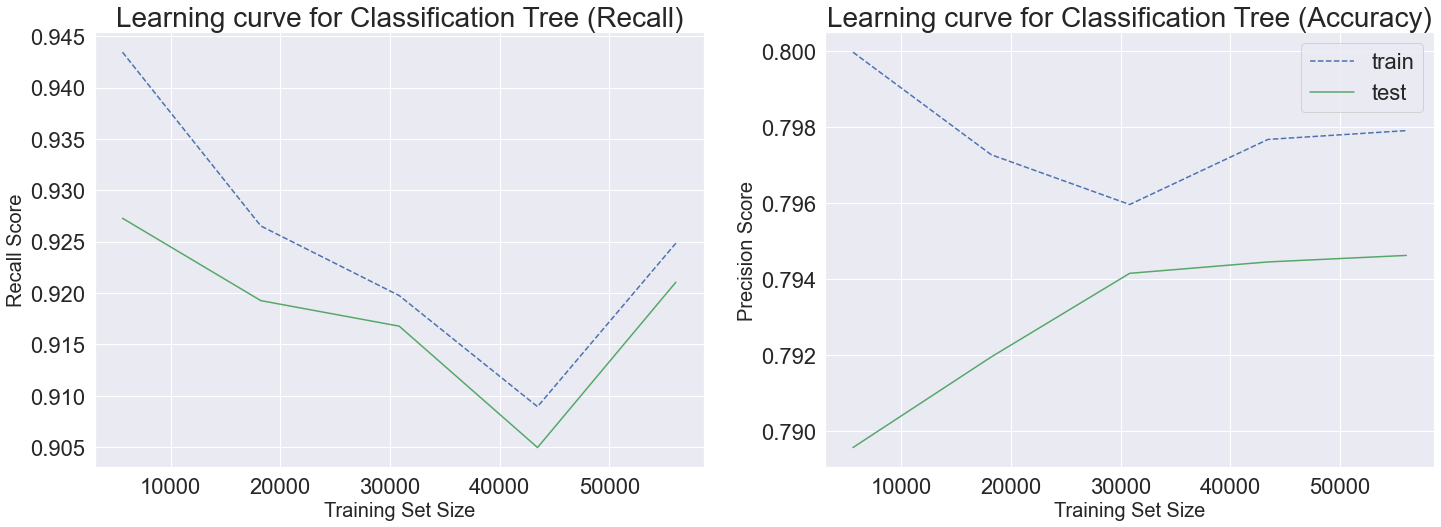

In [164]:
font_size=20

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))

new_cols = ['Age', 'Previously_Insured', 'Policy_Sales_Channel', 'Vehicle_Damage_n']
target = 'Response'

X = df4[new_cols]
y = df4[target]

X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Join the training sets together again
temp_df = X_train_temp.join(y_train_temp)
# Get all the rows where the response is 1
minority_rows = temp_df[temp_df['Response'] == 1]
# Get the count of those rows
minority_count = minority_rows.shape[0]
# Get a sample of the observations in the dataset that indicate they are not interested
majority_rows = temp_df[temp_df['Response'] == 0].sample(minority_count, replace=False, random_state=0)
# Join the two sets together
df_balanced = pd.concat([majority_rows, minority_rows])
# Shuffle the observations
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)
# Remove the response from the balanced dataset
X_train = df_balanced[df_balanced.columns[df_balanced.columns != 'Response']]
y_train = df_balanced['Response']

# Left Graph
train_sizes, train_scores, test_scores = learning_curve(DecisionTreeClassifier(max_depth=8, criterion='entropy', min_samples_split = 2), X_train, y_train, cv=5, scoring='recall')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
ax1.plot(train_sizes, train_scores_mean,'--', color="b", label='train')
ax1.plot(train_sizes, test_scores_mean, label='test', color="g")
ax1.set_xlabel('Training Set Size', fontsize=font_size)
ax1.set_ylabel('Recall Score', fontsize=font_size)
ax1.set_title('Learning curve for Classification Tree (Recall)', fontsize=font_size+8)

# Right graph
train_sizes, train_scores, test_scores = learning_curve(DecisionTreeClassifier(max_depth=8, criterion='entropy', min_samples_split = 2), X_train, y_train, cv=5, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
ax2.plot(train_sizes, train_scores_mean,'--', color="b", label='train')
ax2.plot(train_sizes, test_scores_mean, label='test', color="g")
ax2.set_xlabel('Training Set Size', fontsize=font_size)
ax2.set_ylabel('Precision Score', fontsize=font_size)
ax2.set_title('Learning curve for Classification Tree (Accuracy)', fontsize=font_size+8);
plt.legend();

Both the graphs above show that our final classification tree model has very high bias. 

<h1> Conclusion </h1>